<a href="https://colab.research.google.com/github/hemanth2000/fft-notes/blob/main/ImageCompressionFFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Compression

2D Image is a 2d grid with pixel values ranging between 0 and 255. 

FTT is applied on rows and again FFT is applied on the columns. The resulting fourier coefficients can be thresholded and apply inverse FFT to get back the image. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Using FFT

(-0.5, 639.5, 637.5, -0.5)

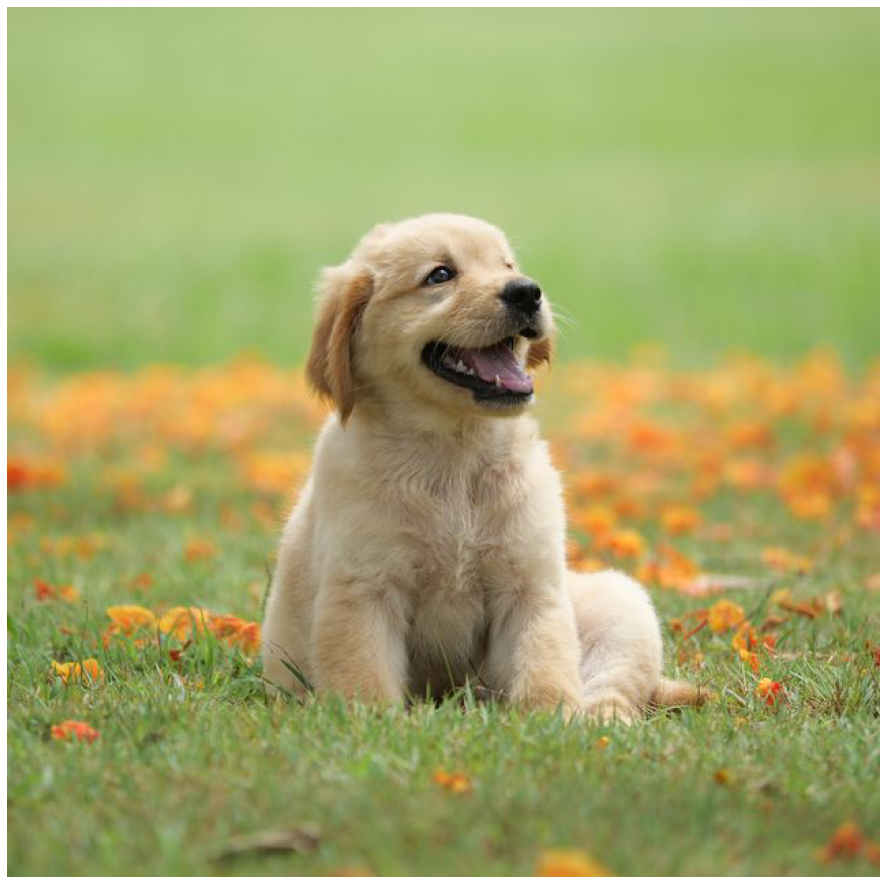

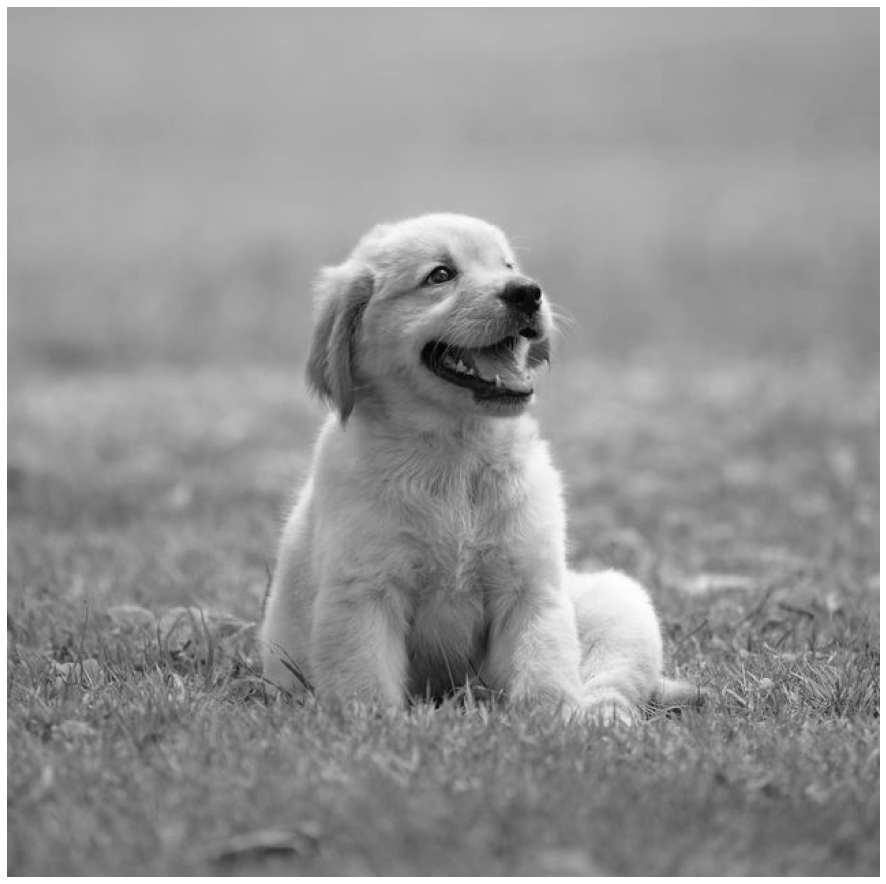

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('/content/drive/MyDrive/FFT','dog2.jpg'))
B = np.mean(A,-1) # Convert RGB to grayscale

plt.figure()
plt.imshow(A)
plt.axis('off')

plt.figure()
plt.imshow(B,cmap='gray')
plt.axis('off')

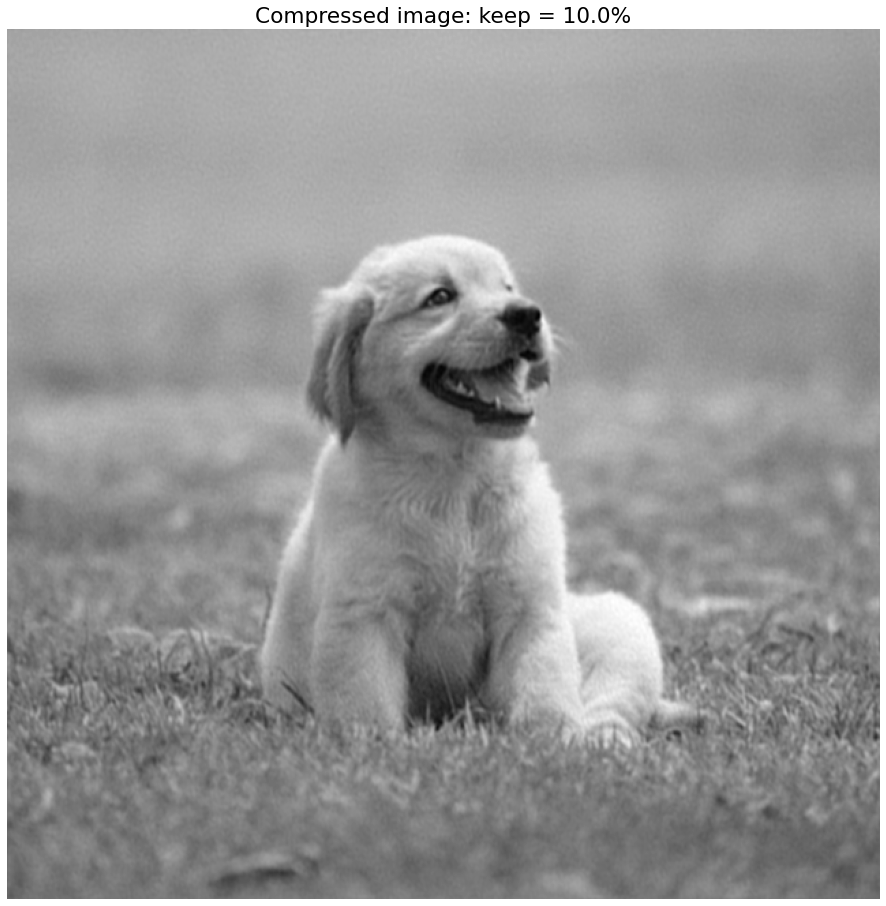

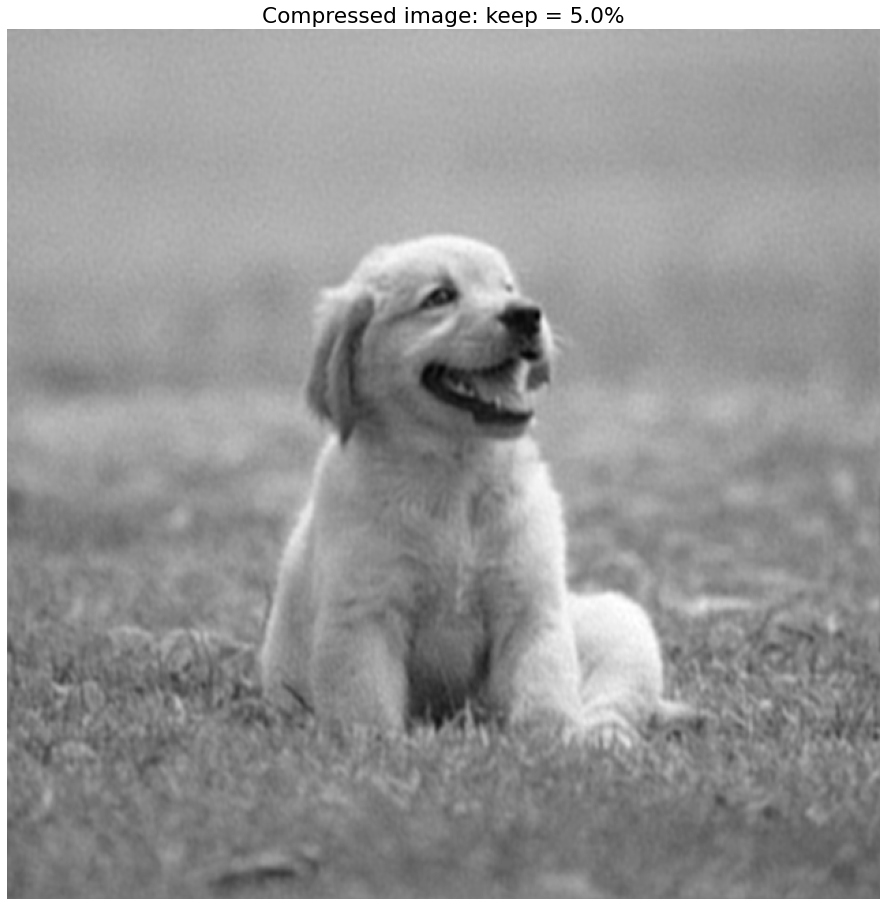

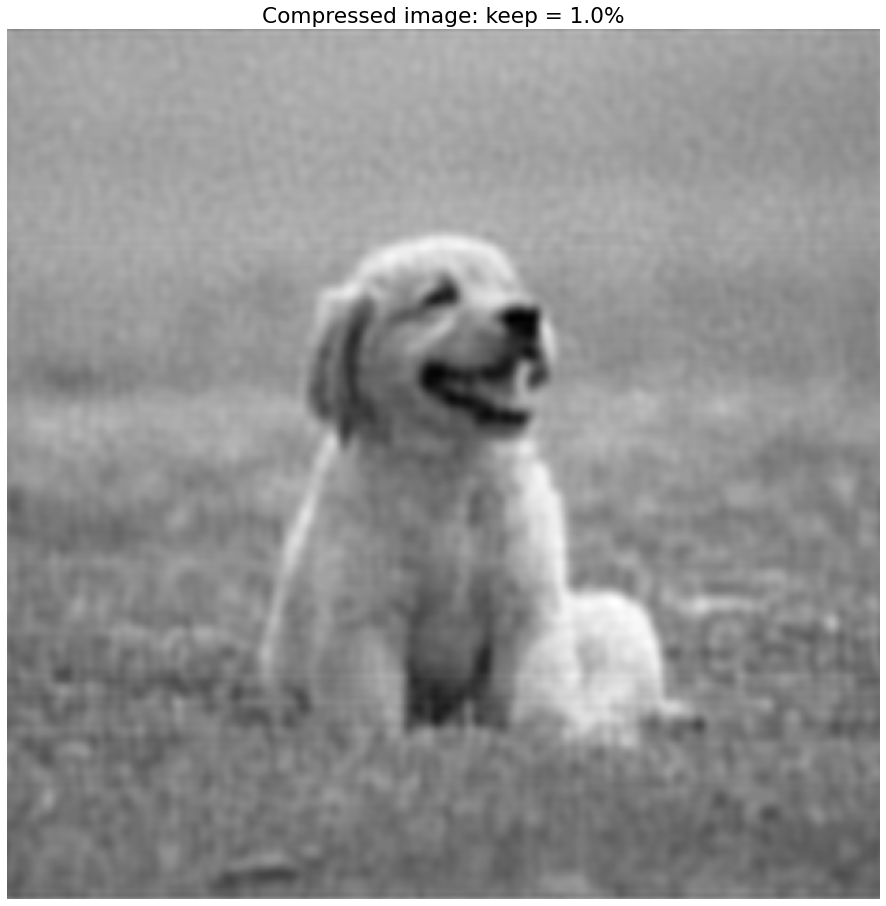

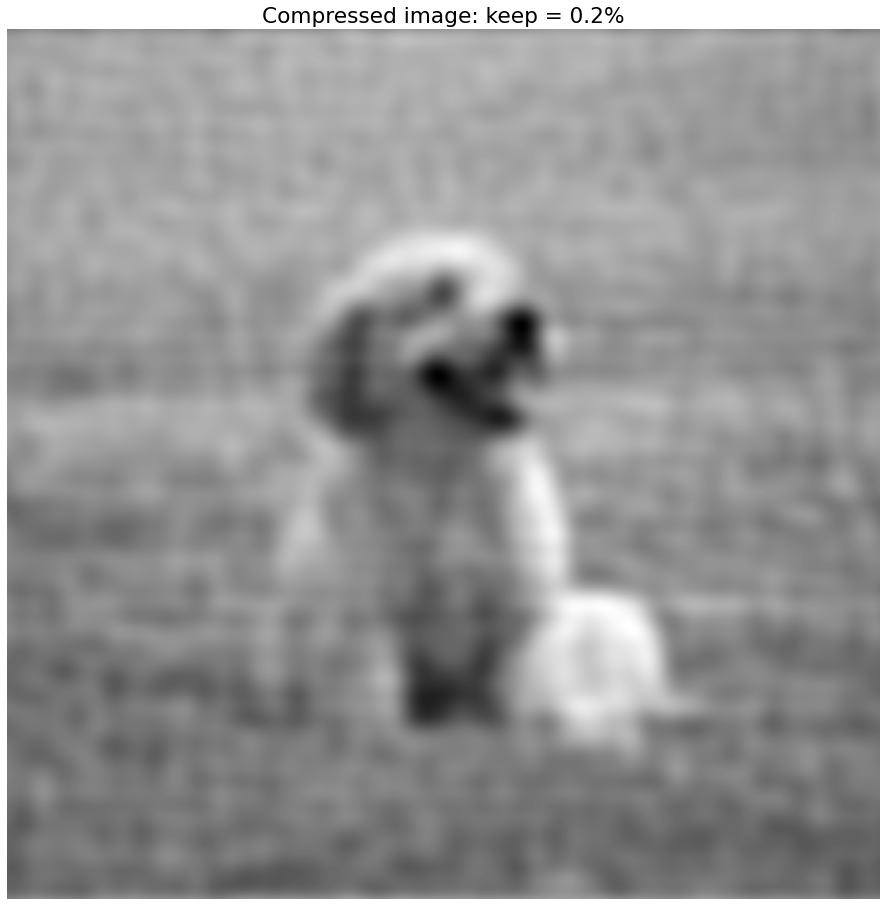

In [22]:
Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

for keep in (0.1, 0.05, 0.01, 0.002):
  thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
  ind = np.abs(Bt)>thresh
  Btlow = Bt *ind
  Alow = np.fft.ifft2(Btlow).real
  plt.figure()
  plt.imshow(Alow,cmap='gray')
  plt.axis('off')
  plt.title('Compressed image: keep = ' + str(keep*100) + '%')


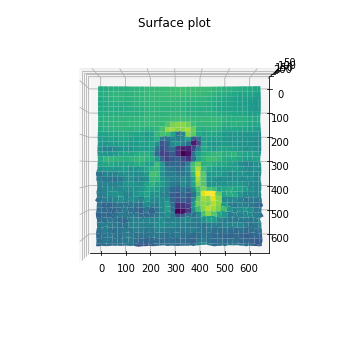

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
plt.rcParams['figure.figsize'] = [6,6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1,np.shape(B)[1]+1),np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10],Y[0::10,0::10],B[0::10,0::10],cmap='viridis',edgecolor='none')
ax.set_title('Surface plot')
ax.view_init(270,270)
plt.show()